In [36]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [37]:
music = pd.read_csv("cleaned_music.csv")
music

,Unnamed: 0,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
1,1,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,2,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,3,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,4,Axel Boman,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.216,-10.517,Minor,0.0412,?,0.614,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45056,45056,Night Lovell,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,0.629,Hip-Hop
45057,45057,Roy Woods,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
45058,45058,Berner,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
45059,45059,The-Dream,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


In [38]:
music = music.drop(["Unnamed: 0"], axis = 1)

# 3) Exploratory Analysis

Looking at the top 20 artists with the most number of songs

In [39]:
artists = music["artist_name"].value_counts()[:20].sort_values(ascending = True)

In [40]:
artists

ASIAN KUNG-FU GENERATION      81
Ryuichi Sakamoto              83
Mac Miller                    85
Howard Shore                  86
Logic                         86
Kevin Gates                   90
Pyotr Ilyich Tchaikovsky      93
Future                       106
The Black Keys               107
Thievery Corporation         115
Eminem                       136
Capcom Sound Team            148
Drake                        152
Yuki Hayashi                 152
Frédéric Chopin              224
Ludwig van Beethoven         283
Johann Sebastian Bach        295
Wolfgang Amadeus Mozart      360
Nobuo Uematsu                386
empty_field                 2246
Name: artist_name, dtype: int64

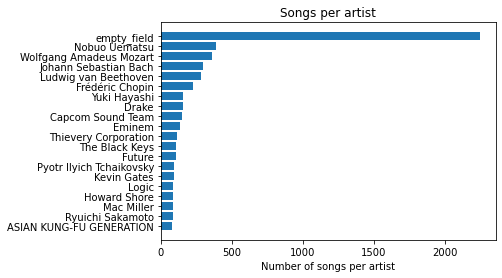

In [41]:
plt.barh(artists.index, artists)
plt.xlabel("Number of songs per artist")
plt.title("Songs per artist")
plt.show()

It seems the dataset was compiled by Japanese authors or in Japan since several artists in top20 are from the Land of the Rising Sun. Furthermore, many composers (e.g., Mozart, Beethoven, etc.) also found their place in this list. Now, to avoid large number of features, the artist_name is removed.

In [42]:
music.drop("artist_name", axis = 1, inplace = True)

A brief check shows that most of the features hold numerical values save three columns which has categorical data. All feature are explored further in the next chapter.

In [43]:
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
4,47.0,0.00523,0.755,519468.0,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,?,0.614,Electronic


Visualizing Data

Visualizing counts and distributions simplify overview and understanding of data. The plots below show counts in each class in the three categorical features.

In [44]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = music, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

The plot below shows how many times each key present in the dataset. The most frequent one is "C" and the least frequent one is "D#"

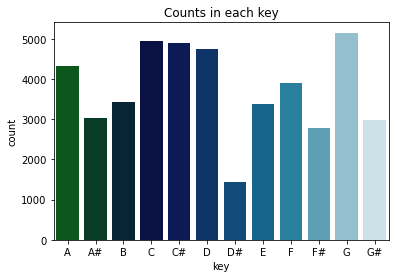

In [45]:
plot_counts("key", ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"])

The plot below shows the mode in all songs of the dataset.

Majority of the songs are in "major" mode.

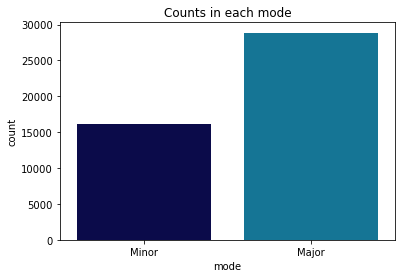

In [46]:
plot_counts("mode")

The plot below shows the genre of songs

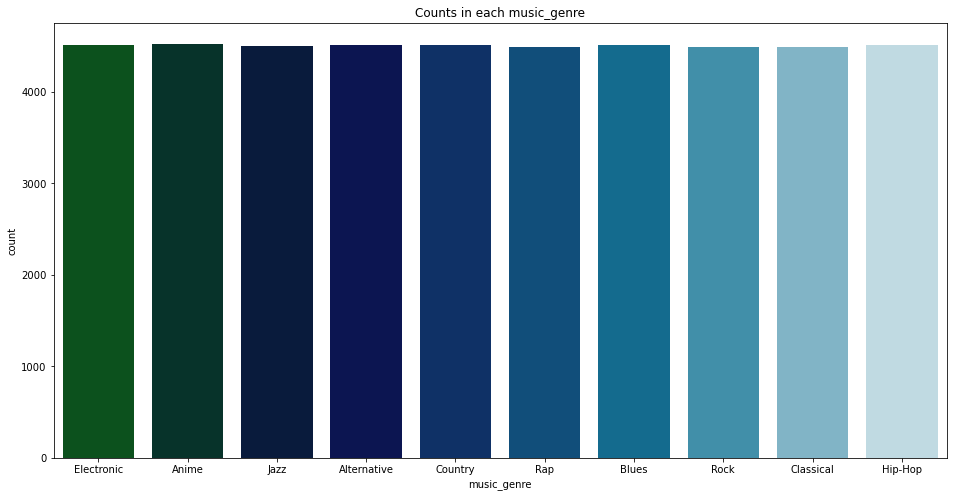

In [47]:
plt.figure(figsize = (16, 8))
plot_counts("music_genre")

We then move on to looking at the continous variables.
Distribution of continuous values in numeric features is displayed on subplots to spare time and space.

Displaying distributions is possible only for features holding numeric values. For this reason, they are stored in a separate variable.

In [50]:
numeric_features = music.drop(["key", "music_genre", "mode"], axis = 1)

The code lines below display the distributions of all numeric features on subplots. They are interpreted thereafter.

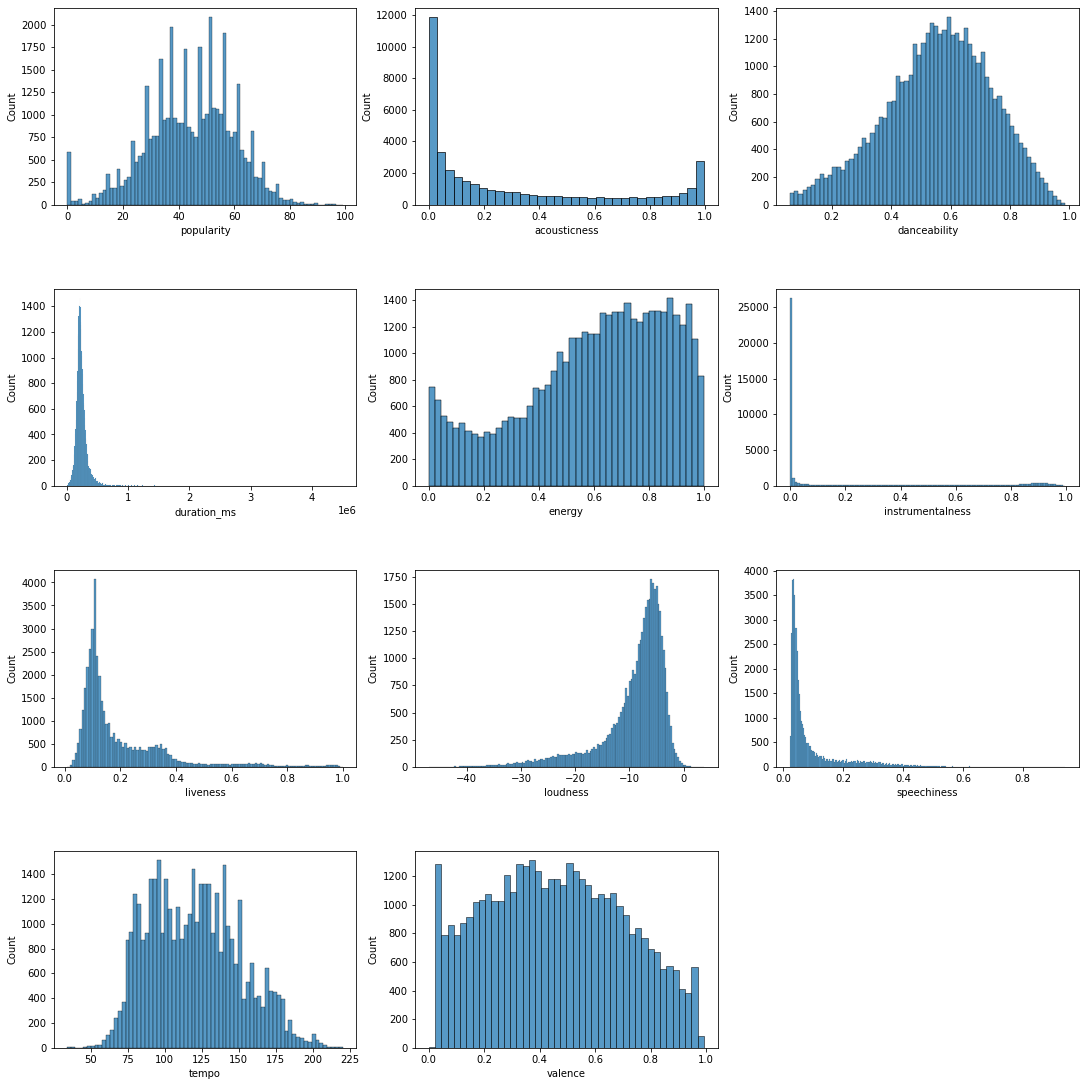

In [51]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in numeric_features.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Music characteristics are well explained here. Popularity has bi-modal distribution having peaks at around 48 and 55. Some values have much higher frequencies. In fact, it is not quite clear what "popularity" means here - the number of weeks in a chart, or number of points obtained after a survey (for example).

Acousticness is measured on a scale of 0.0 (not acoustic) to 1.0 (very acoustic). Songs with higher acousticness are more likely to use acoustic and non-electronic instruments. The second subplot shows that most songs / music pieces are not acoustic.

Danceability quantifies how suitable a track is for dancing based on a combination of musical elements, like tempo, rhythm, and beat. Songs with higher danceability have stronger and more regular beats. Like acousticness, danceability is measured on a scale of 0.0 (low danceability) to 1.0 (high danceability). In terms of danceability, values in this feature have - more or less - normal distribution.

Music duration is given in milliseconds. Most samples are not longer than 0.3e6 (300 000) milliseconds, or 300 seconds, or exactly 5 minutes. Sounds reasonable.

Energy measures the perceived intensity and activity of a song. Energy is also measured on a scale of 0.0 (low energy) to 1.0 (high energy). Songs with higher energy are more intense, dynamic, and loud. The distribution on the fifth subplot shows that most of the music pieces are described with high energy.

On the other hand, instrumentalness predicts whether a track contains vocals. Instrumentalness is measured on a scale of 0.0 (likely contains vocal content) to 1.0 (likely contains no vocal content). Songs with higher instrumentalness are less likely to have vocals. Distribution of values in terms of instrumentalness is quite skewed - most samples has value of 0 or around 0, which means the songs are characterized with vocal content.

Liveness detects the presence of an audience in a song. Liveness is also measured on a scale of 0.0 (no audience) to 1.0 (audible audience). Songs with higher liveness are more likely to have been performed live. It seems the songs in our dataset are performed without audience - most liveness values are closer to 0.0 than to 1.0.

The next feature is loudness - it measures the decibel level of a song. Decibels are relative to a reference value, so songs with lower loudness values are quieter relative to the reference value of 0. Taking this into account, value distribution in loudness shows that most music samples are quieter (their loudness is closer to 0).

Speechiness measures the presence of spoken words in a song. It is measured on a scale of 0.0 (low speechiness) to 1.0 (high speechiness). Songs with higher speechiness are mostly composed of spoken words, like poetry or a talk show. Distribution of speechiness is rather skewed on the right - most songs / pieces seem to have no or very small number of spoken words.

Tempo measures the beats per minute (bpm) of a song. Many popular songs range from 50 bpm to 200 bpm. Songs with higher tempo have a faster pace. Distribution of tempo values is very similar to the one of "popularity".

And finally, valence measures the positivity of a song. It is measured on a scale from 0.0 (low valence) to 1.0 (high valence). Songs with higher valence sound happier and more cheerful. Distribution of valence in out dataset is not normal - valence of most songs is somewhere between 0.2 and 0.7. Only a tiny number of songs are characterised with high valence.

The code lines below help for displaying numeric features on boxplots. The latter are very useful for identifying outliers, i.e., extreme or wrong values in a feature. Outliers could distort model training and inference. For this reason, it is a good practice (whenever possible and justifiable) to remove them. A brief overview of outliers is given below the plots.

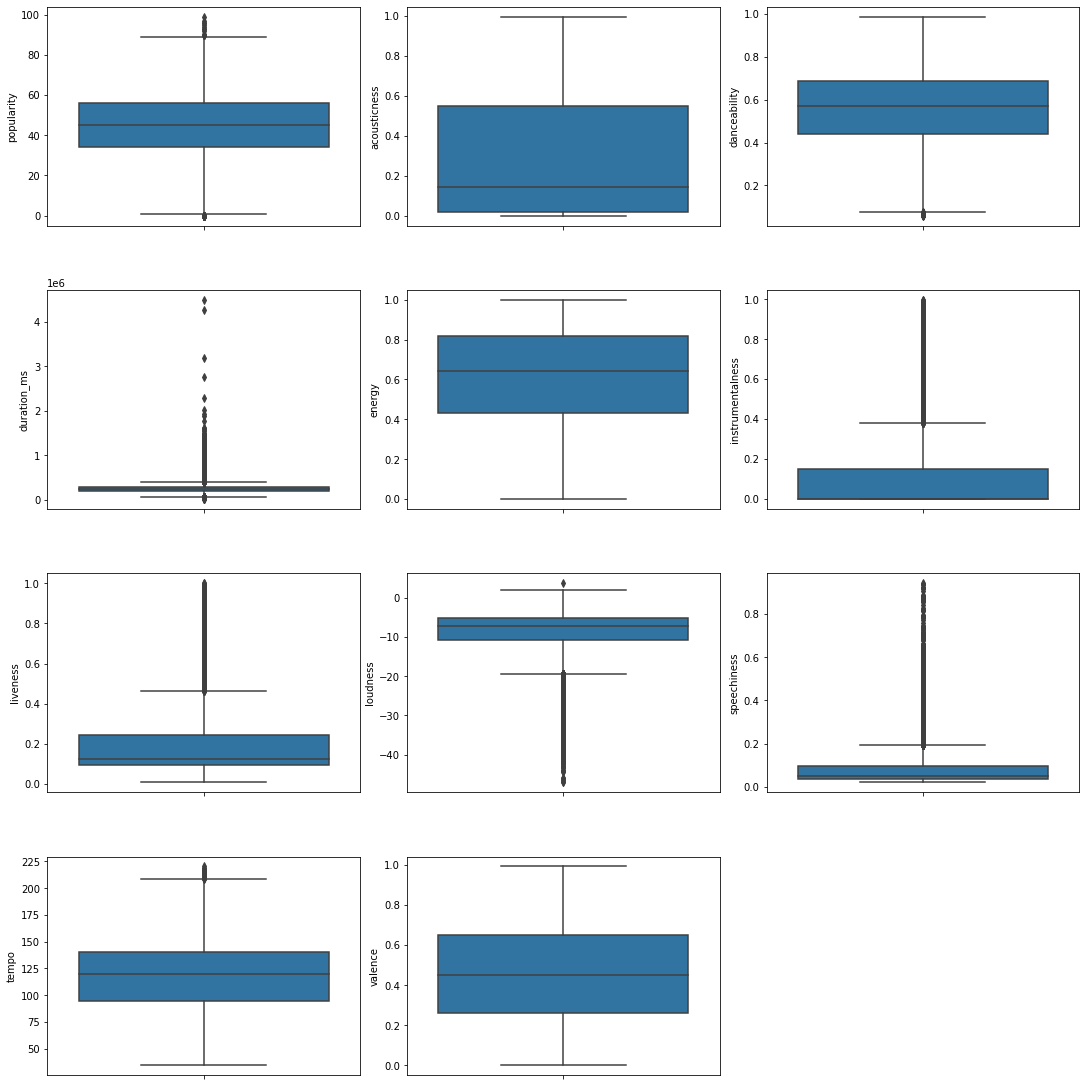

In [52]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in numeric_features.items():
    sns.boxplot(y = k, data = numeric_features, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

A small number of outliers are seen in popularity, danceability, and tempo. On the other hand, many extreme values are found in duration, instrumentlness, liveness, loudness, and speechiness. Since the overall objective of this exercise is not devising the best model but to interpret classification outputs, outliers are not removed.

Now, we will look at the correlation between song genre and every variable. Variables with high correlation will be the predictors for our response.

Below are the boxplots showing the correlation between song genres and acousticness

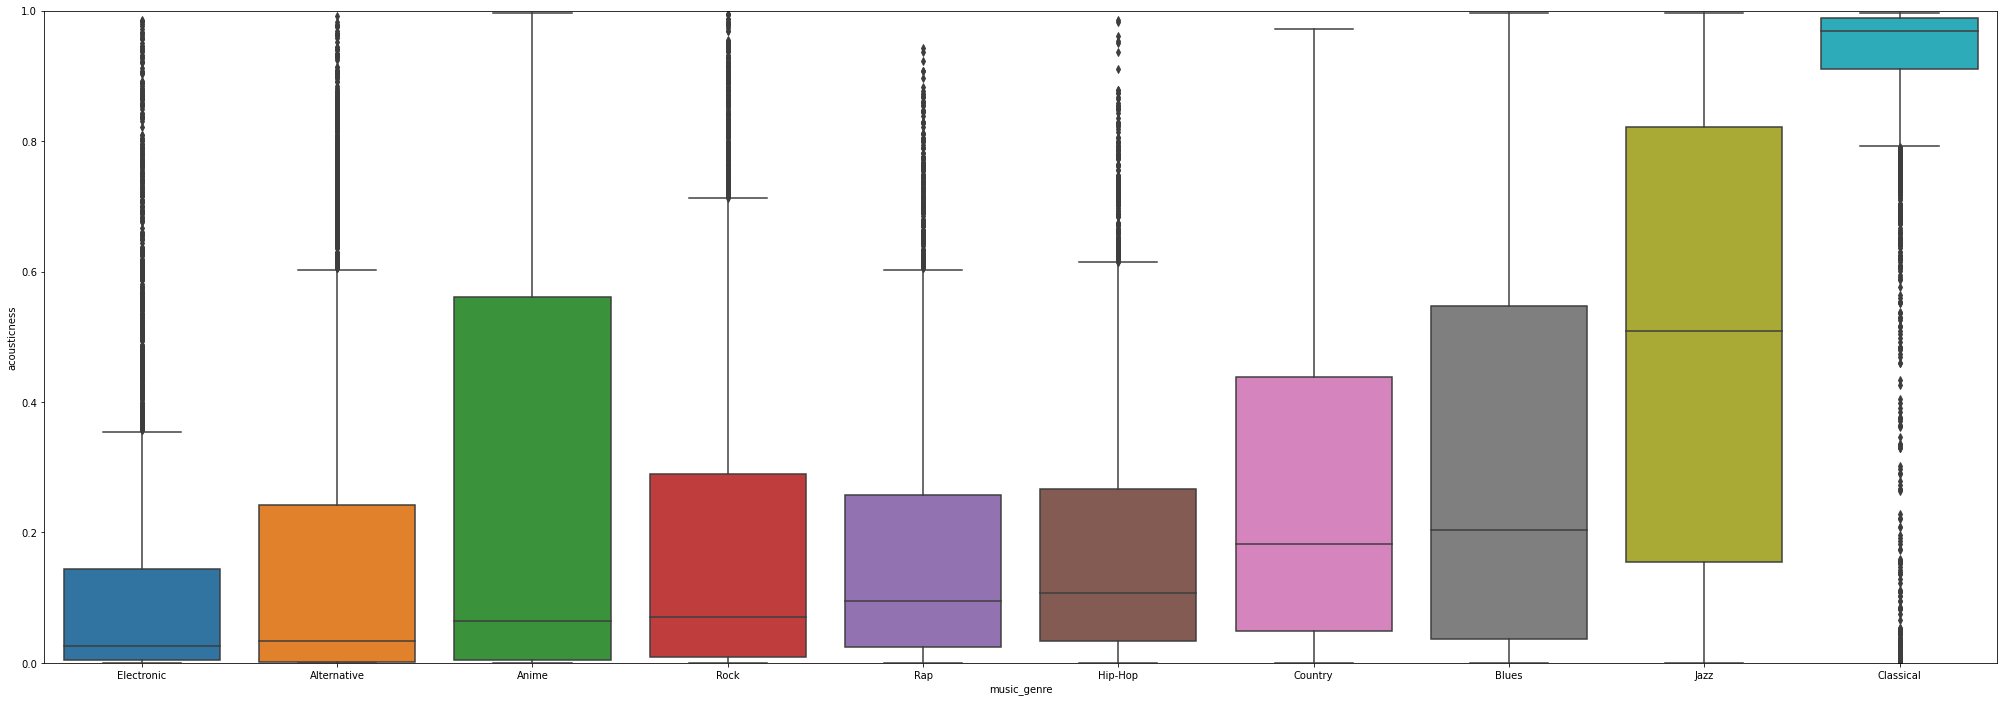

In [53]:
group_means=music.groupby(['music_genre'])['acousticness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,1.0)
sns.boxplot(x='music_genre', y='acousticness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and energy

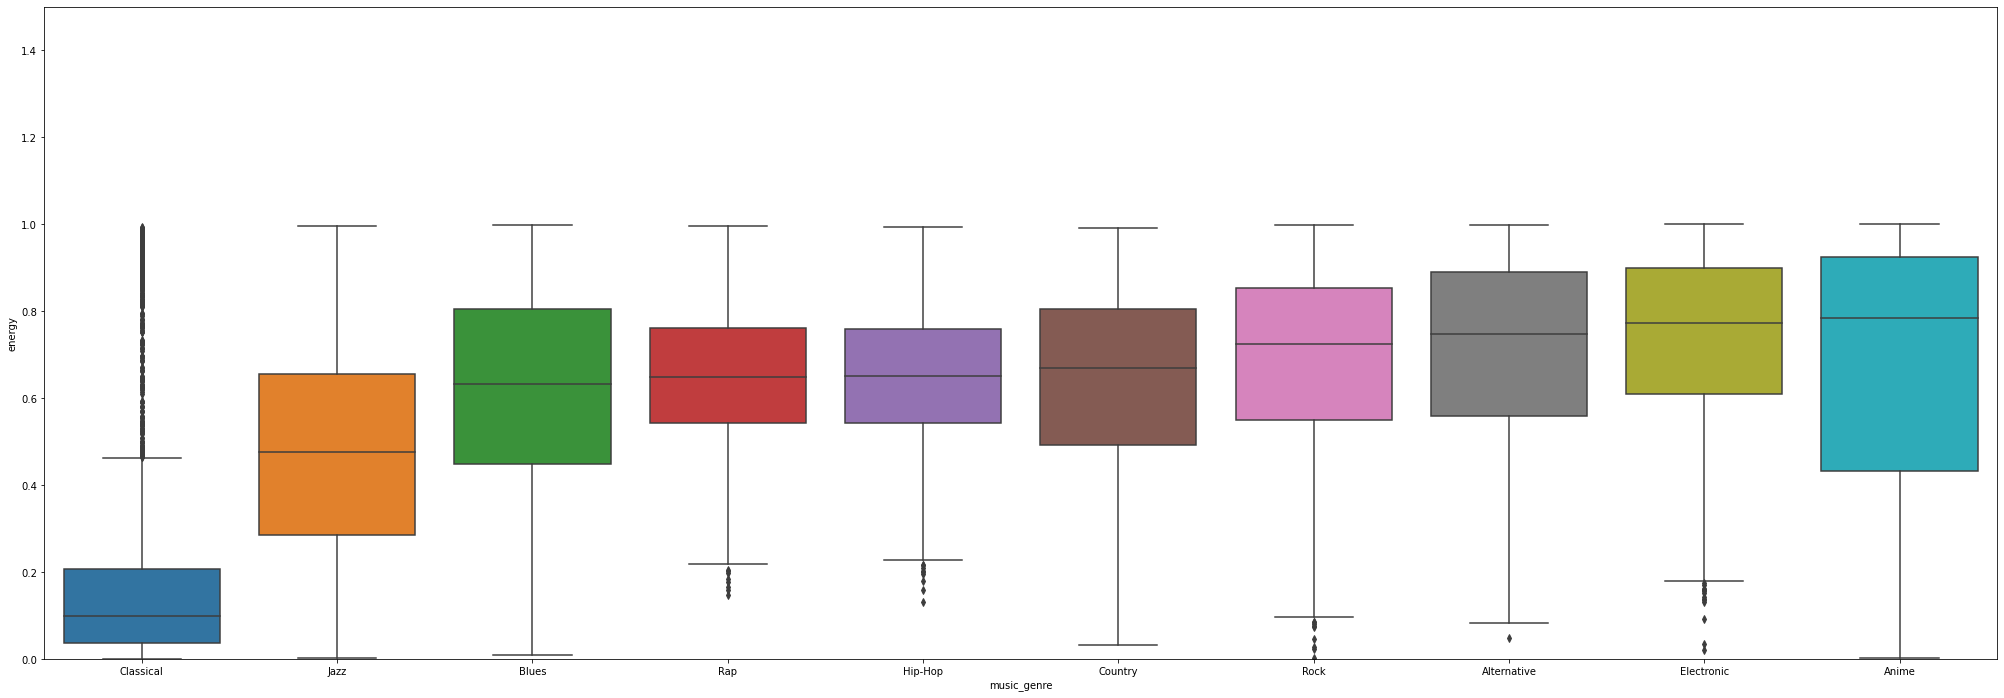

In [54]:
group_means=music.groupby(['music_genre'])['energy'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='energy', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and popularity

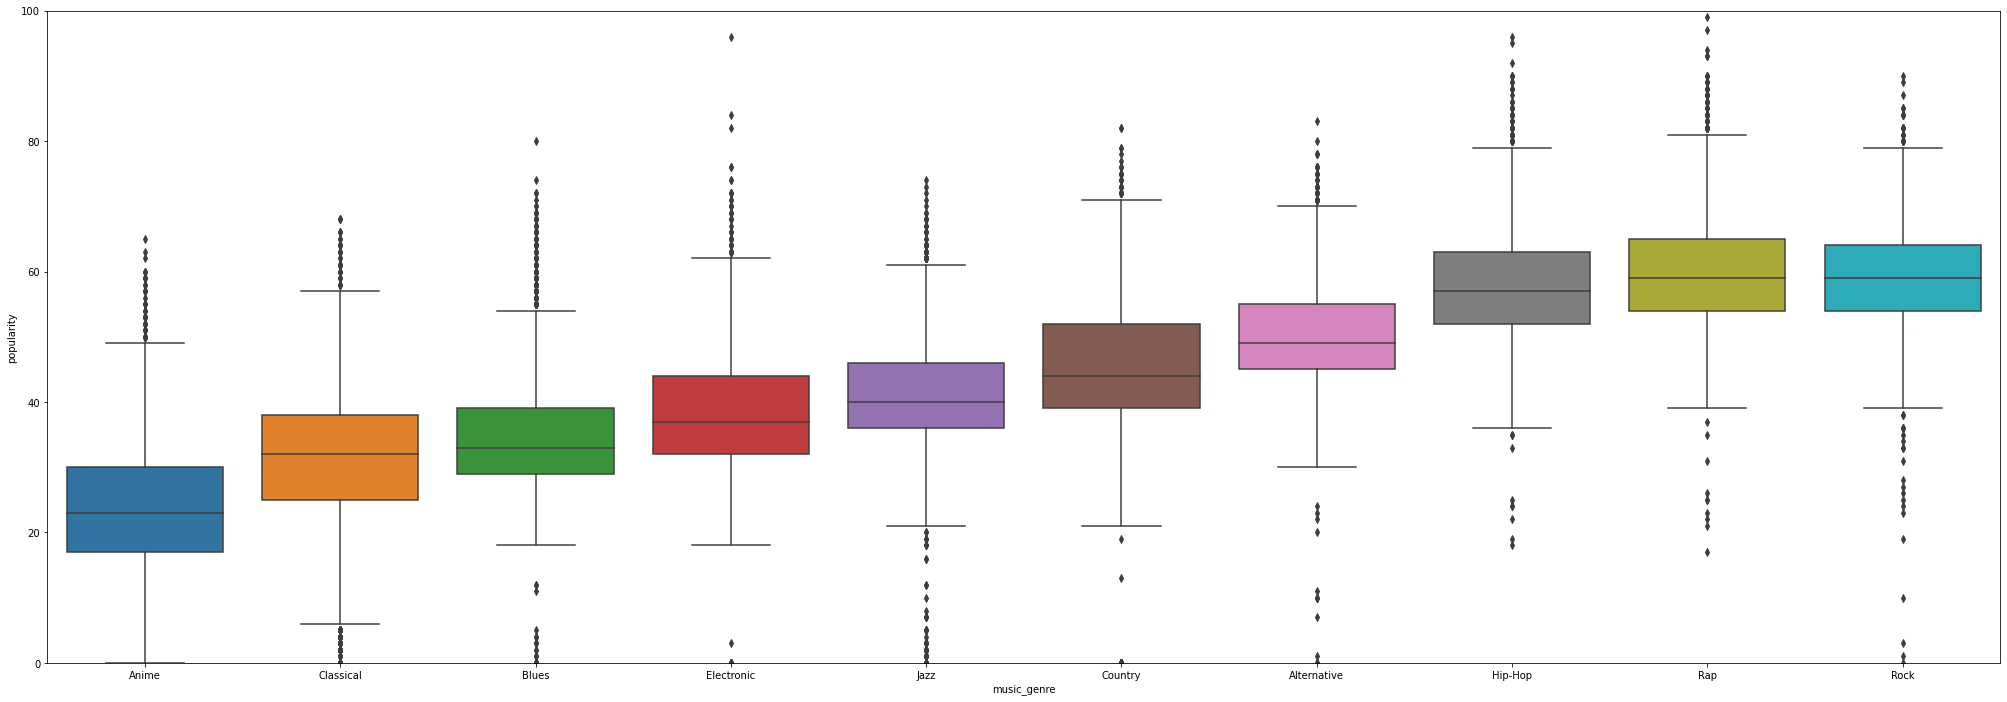

In [55]:
group_means=music.groupby(['music_genre'])['popularity'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,100)
sns.boxplot(x='music_genre', y='popularity', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and danceability

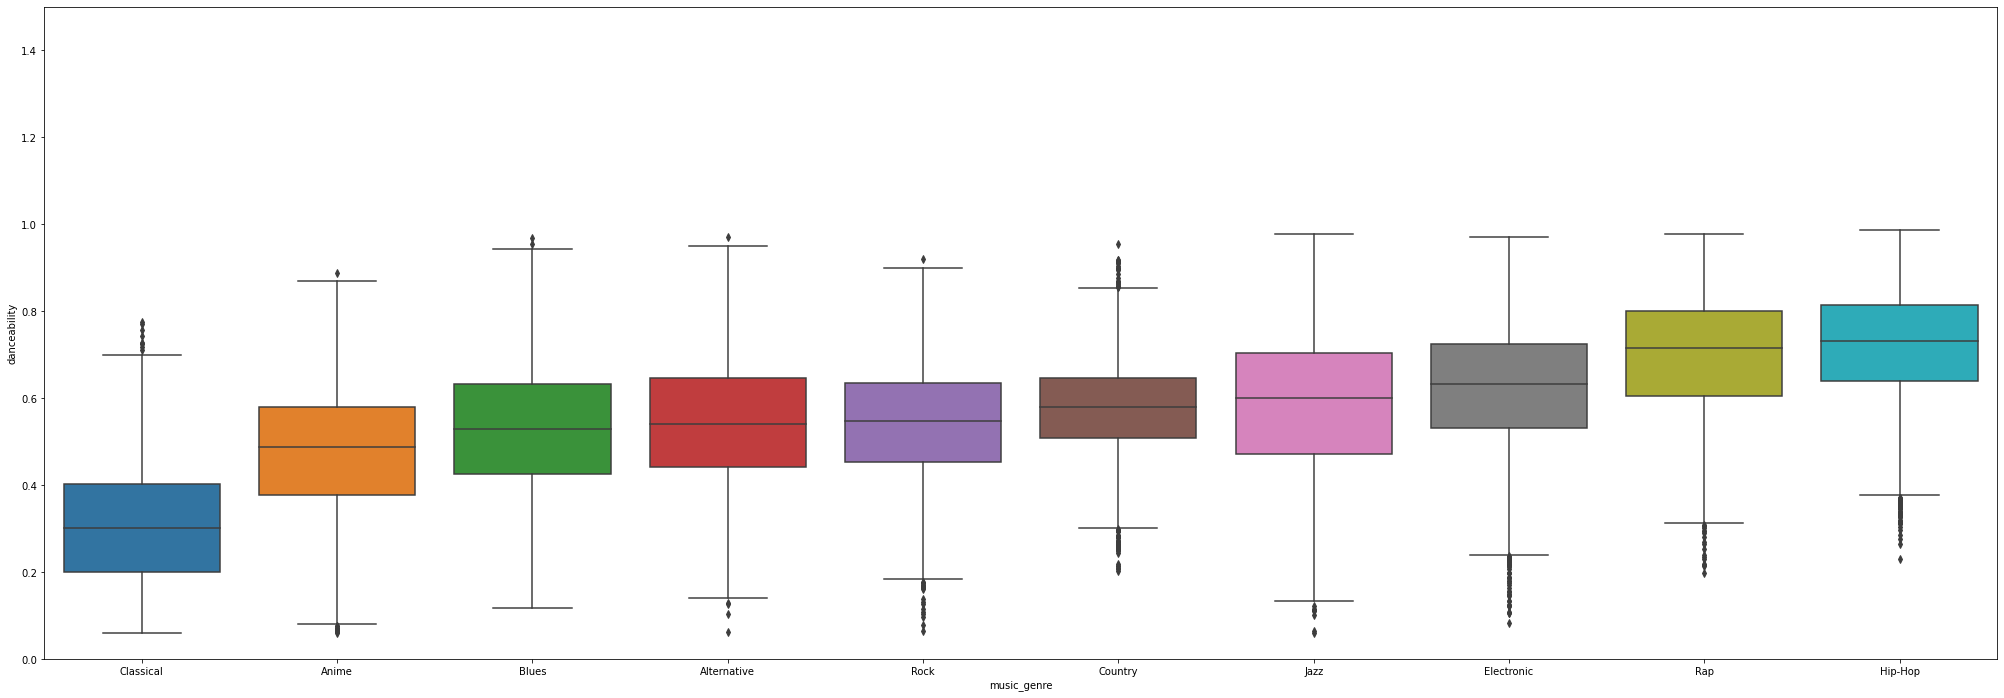

In [56]:
group_means=music.groupby(['music_genre'])['danceability'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='danceability', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and duration_ms

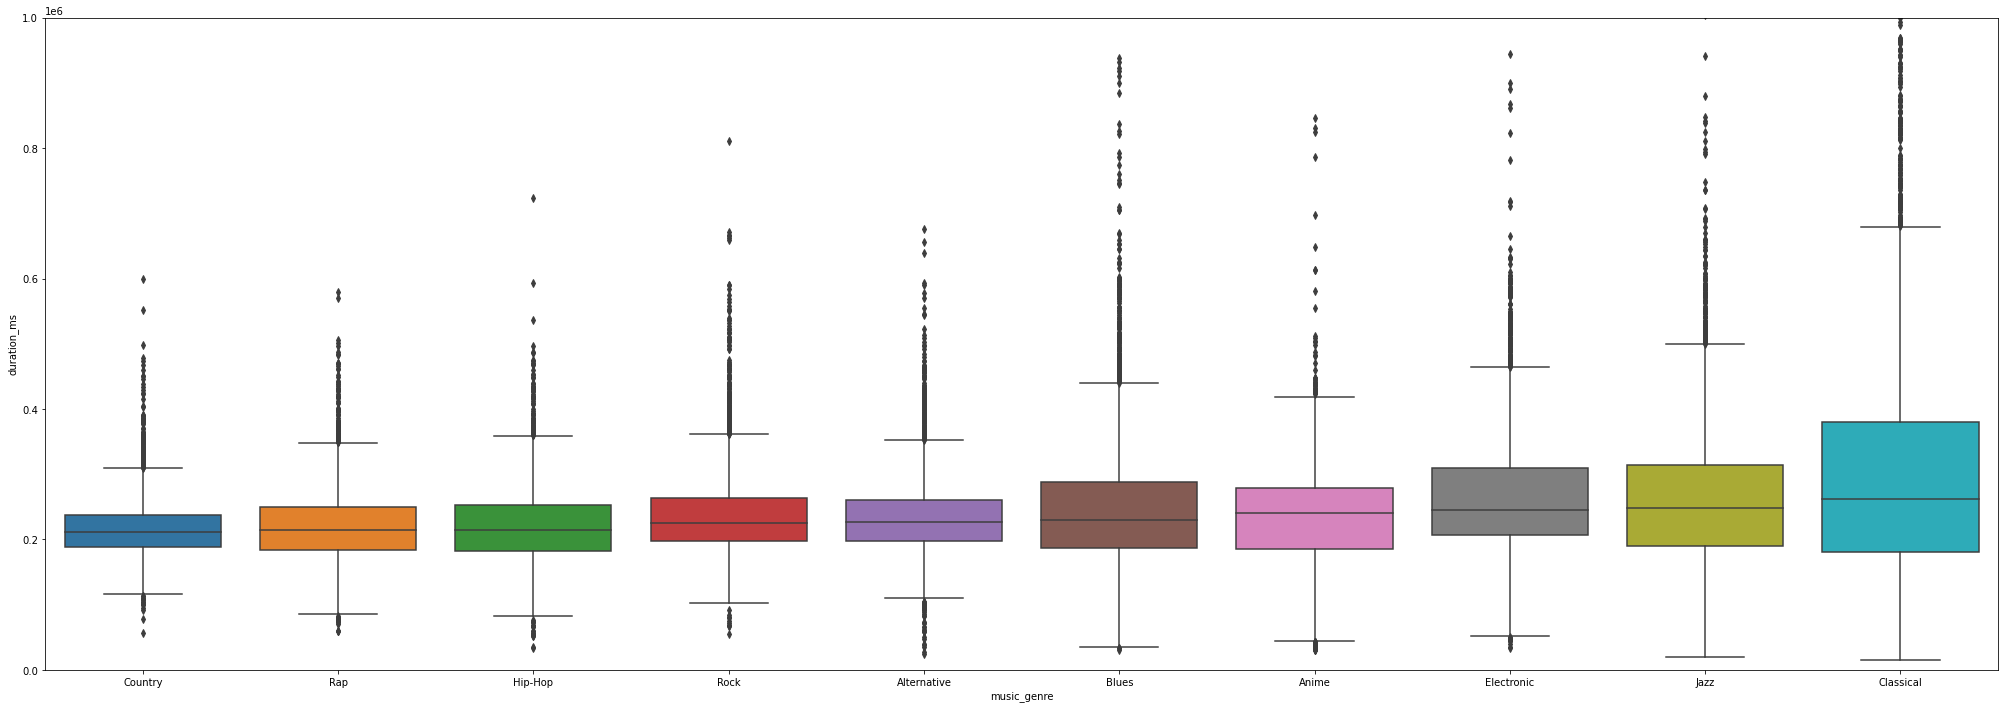

In [57]:
group_means=music.groupby(['music_genre'])['duration_ms'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1000000)
sns.boxplot(x='music_genre', y='duration_ms', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and liveness

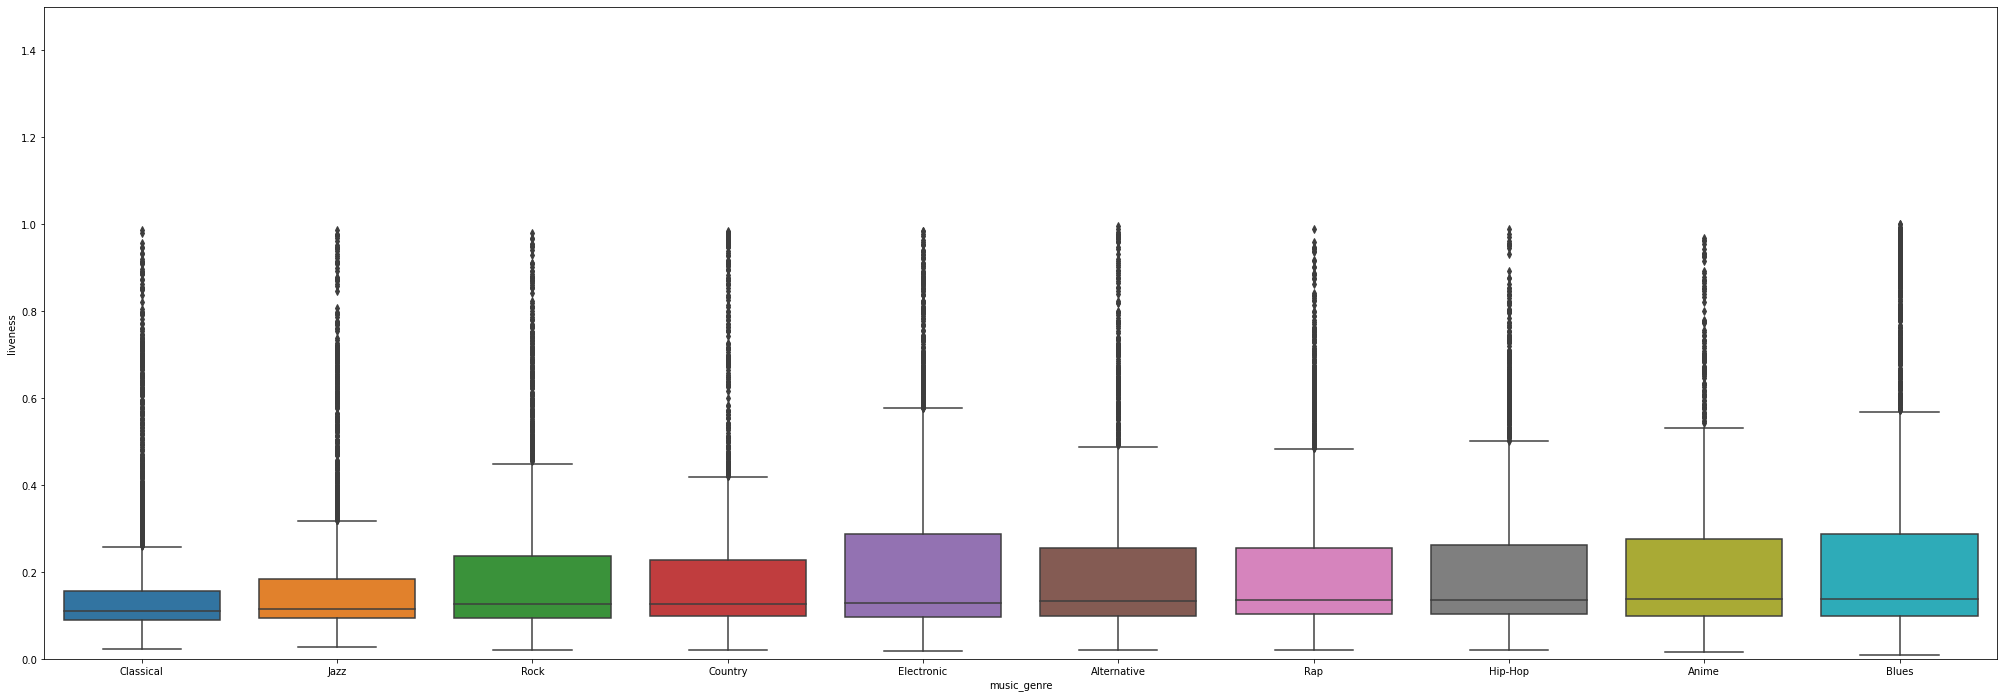

In [58]:
group_means=music.groupby(['music_genre'])['liveness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='liveness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and loudness

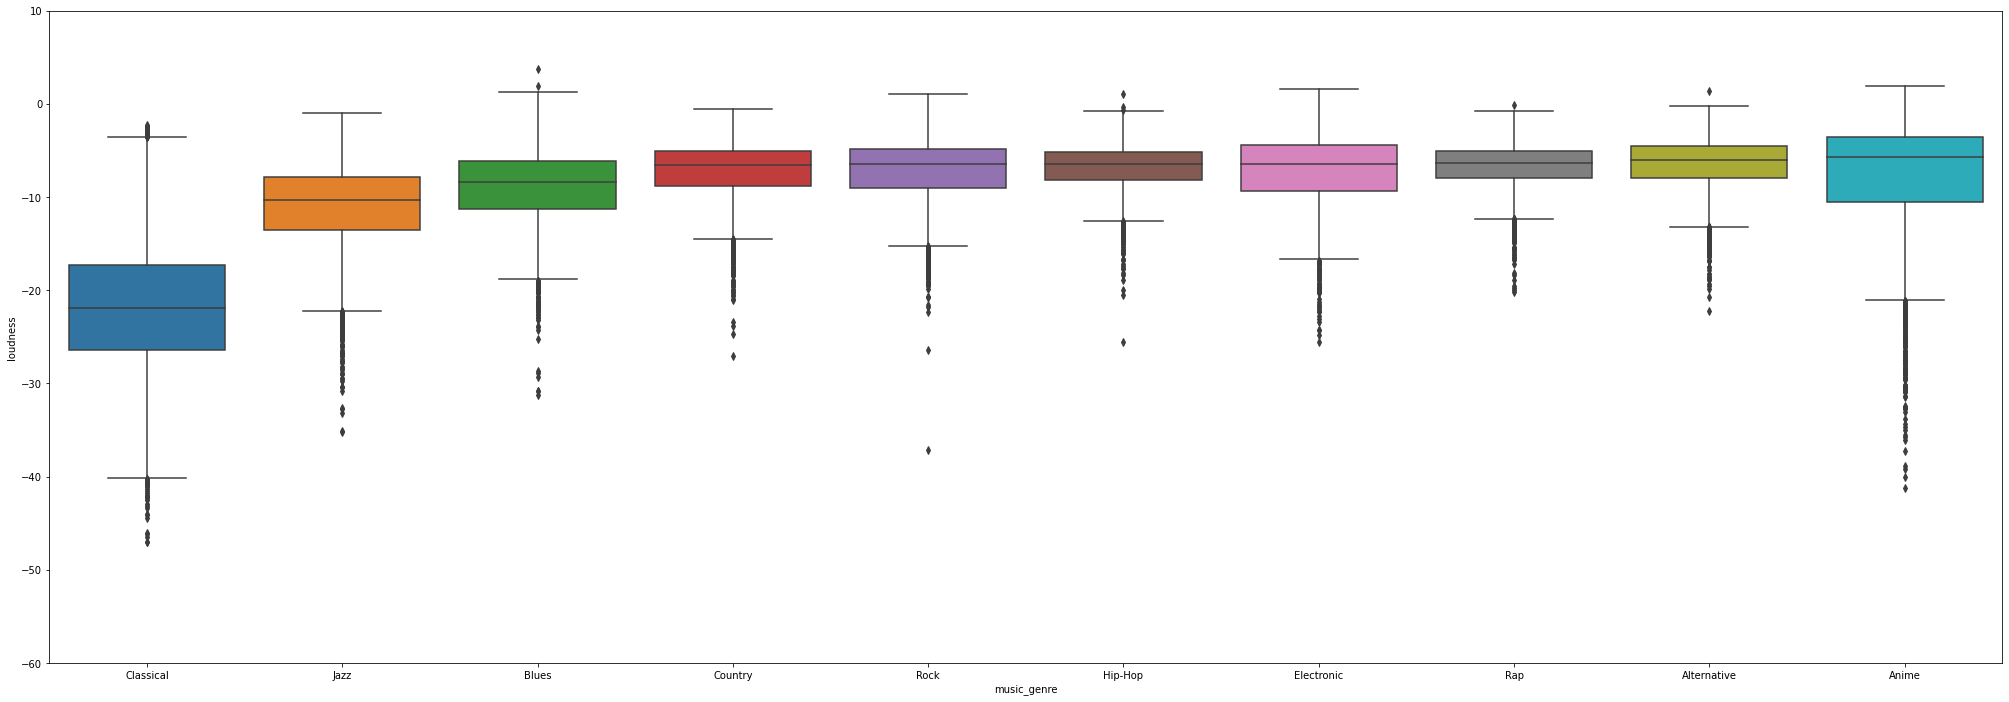

In [59]:
group_means=music.groupby(['music_genre'])['loudness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(-60,10)
sns.boxplot(x='music_genre', y='loudness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and speechiness

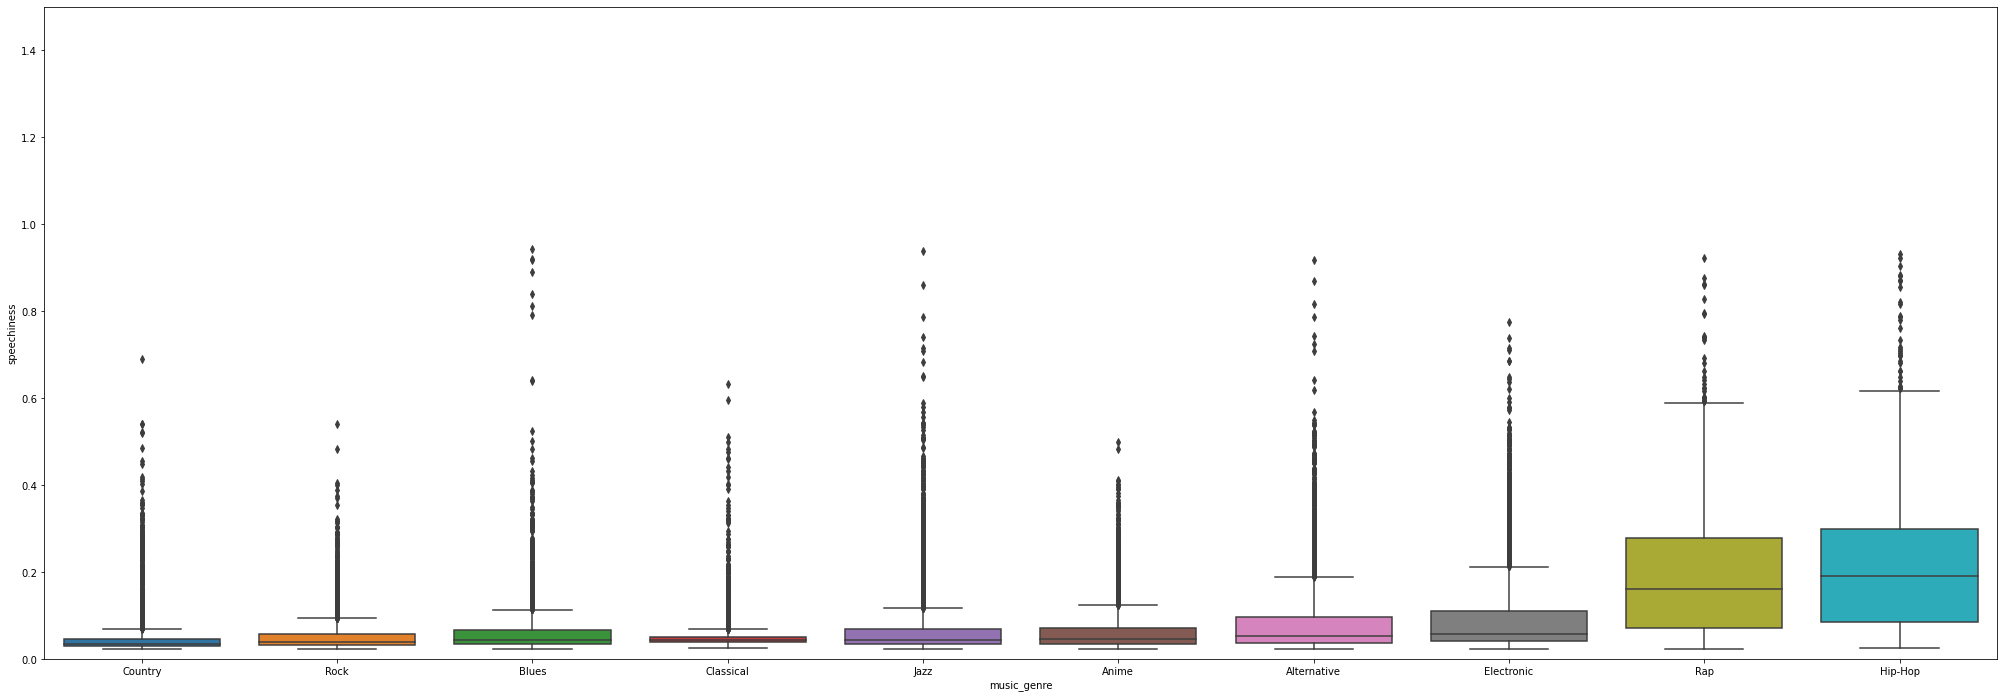

In [60]:
group_means=music.groupby(['music_genre'])['speechiness'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='speechiness', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and valence

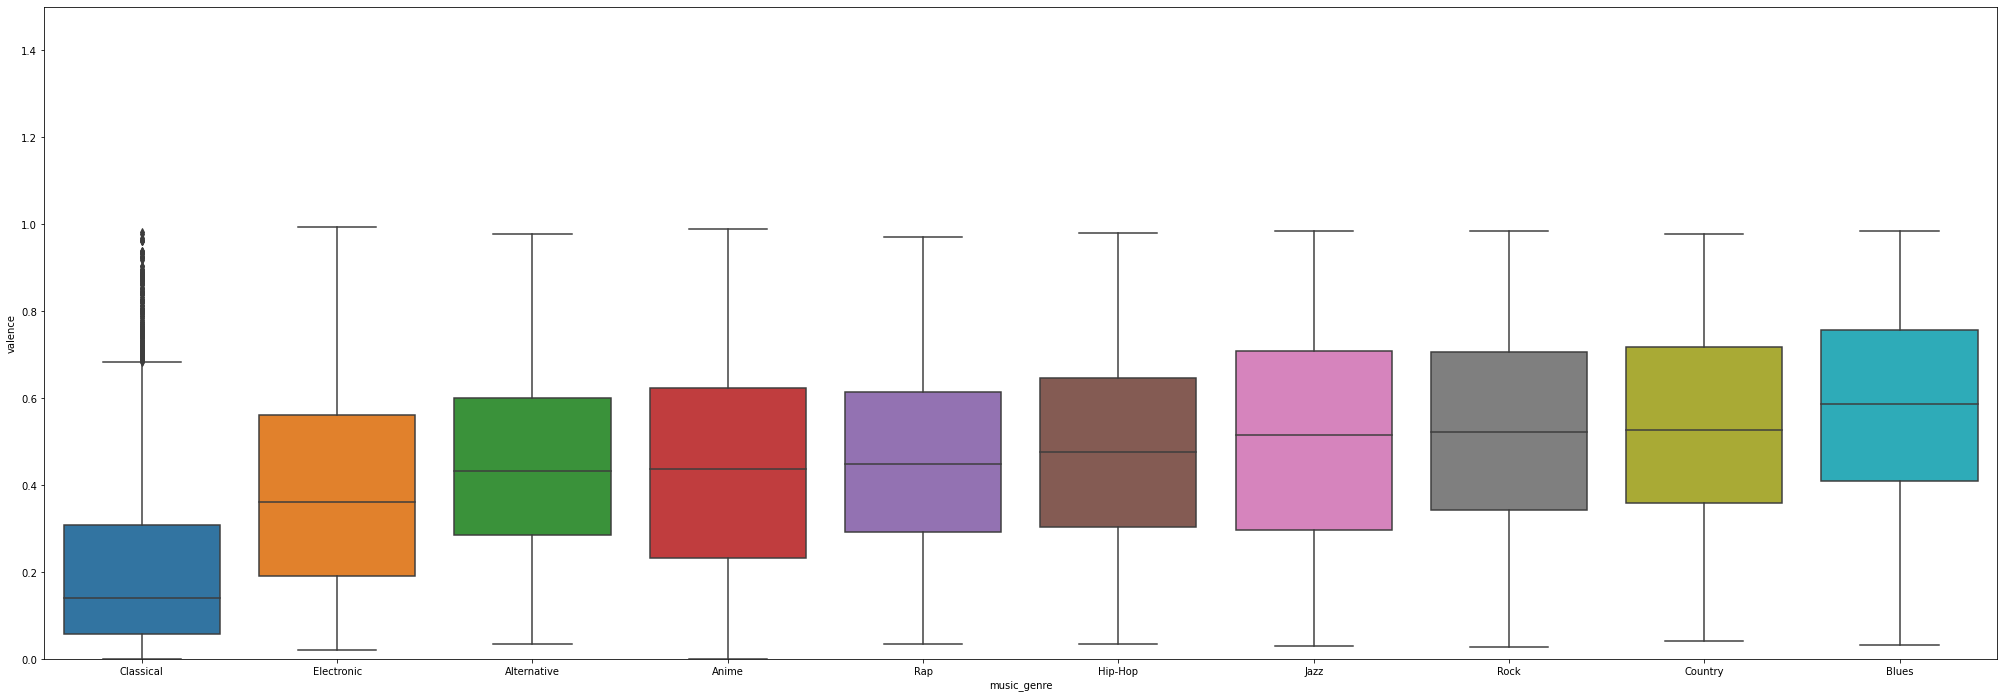

In [61]:
group_means=music.groupby(['music_genre'])['valence'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0.0,1.5)
sns.boxplot(x='music_genre', y='valence', order=group_means.index,data=music)
plt.show()

Below are the boxplots showing the correlation between song genres and tempo

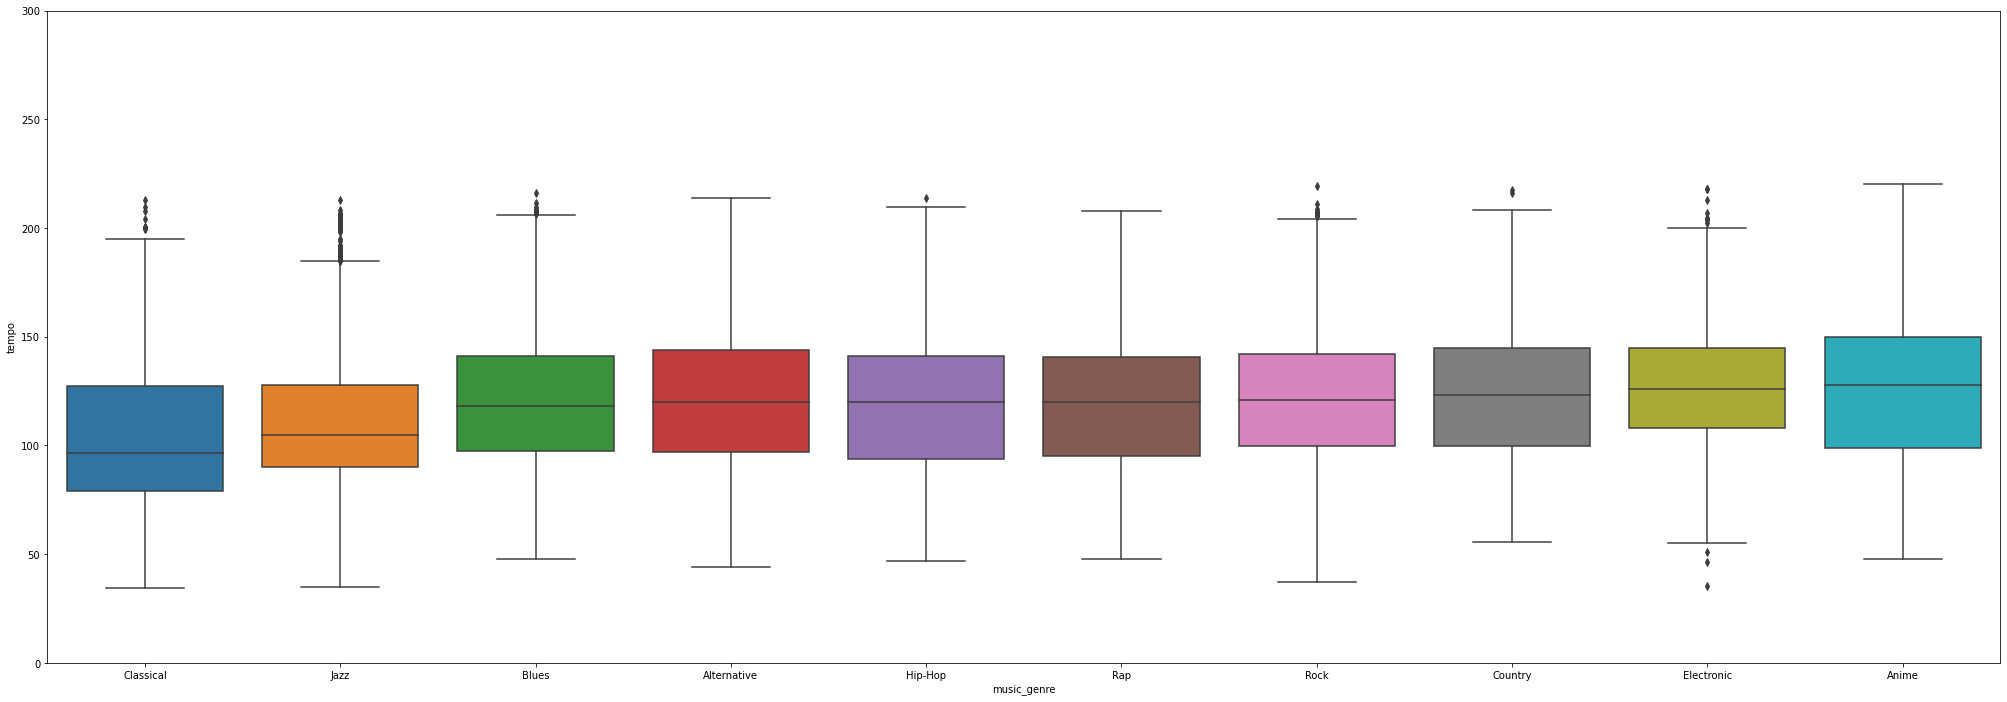

In [62]:
group_means=music.groupby(['music_genre'])['tempo'].median().sort_values(ascending=True)

plt.figure(figsize=(35,12))
plt.ylim(0,300)
sns.boxplot(x='music_genre', y='tempo', order=group_means.index,data=music)
plt.show()

## Chi - Square Test


Now, we will calculate the correlation between the categorical variables and the genre. This will help us understand the relation between the variables, following which we will have a clearer idea of which variables to choose as our predictors.

The correlation will be calculated using the Chi-Square Test, which finds the probability of a null hypothesis (H0). It starts out with the hypothesis H0 : that the two categorical variables are not related to each other. It then generates the probability, called the p-value, that the hypothesis is true, i.e. they are not related to each other.

If the returned p-value is above 0.5, usually we can assume that the two variables are not related. If the p-value falls below 0.5, they have a fairly strong correlation.

Below is the calculation of p-value for acousticness and genre.

In [63]:
music.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
valence             float64
music_genre          object
dtype: object

As we can see here, the categorical variables apart from genre are 'key' and 'mode'. We will now calculate the p-values of these variables with the categorical variable 'genre'.

In [64]:
# importing required functions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

Below is the p-value calculation for genre and key.

In [65]:
# contingency table
table = pd.crosstab(music['music_genre'],music['key'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     2022.8
p-value:            0
degrees of freedom: 99


Below is the p-value calculation for genre and mode of the song.

In [66]:
# contingency table
table = pd.crosstab(music['music_genre'],music['mode'], margins = False)
stat, p, dof, expected = chi2_contingency(table)
print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")


chi2 statistic:     1898.1
p-value:            0
degrees of freedom: 9


As we can see from the above calculations, the p-values for all of these variables is 0.0, which could be read to imply that the genre of the song is dependent on all these variables. However, this could also be because the frequencies or counts vary by large amounts across the columns. We will consider these variables in our prediction model because they clearly have a correlation with the genre of the song.